### Problem 1

In [1]:
x_1 <-rnorm (20 , mean = 0, sd = 1) 
x_2 <-rnorm (10 , mean = 2, sd = 1)
x <-c(x_1 , x_2)
n0 = 10
x

[1] -0.80338247  0.18485702  1.28940890  0.35295805  0.95772678 -0.34083543
 [7]  0.46501787 -0.40301842 -0.30757285 -0.73303781 -0.99620719 -0.24669473
[13]  1.45090640 -0.04039780 -0.40937311  1.56326663  1.52207379 -1.48705133
[19]  1.90230829  0.01630322  2.77025261  1.24242905  0.94465940  2.42270722
[25]  1.40989568  1.95534299  2.78411434  2.67446529  0.97314766  1.68908647

In [2]:
sum(x[1:2])

[1] -0.6185254

In [5]:
w_30 <-rep(0, 30)
w_30

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [6]:
S_2 <-rep (0, 30)
S_2

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [7]:
w_30[(n0 -1)] <-sum(x[1:(n0 -1)])
w_30

[1] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 1.395159 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
[17] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
[25] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000

In [8]:
for (i in 1:(n0 -1))
{
    S_2[(n0-1)] = S_2[(n0 -1)] + (x[i] -mean(x[1: n0]))^2
}

In [9]:
S_2

[1] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 3.828129 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
[17] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
[25] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000

In [10]:
h <-rep(0 , 30)
h_a <- 5.511
T <-rep(0 , 30)
a <-0.005

In [12]:
i = 1

In [13]:
for (i in n0 : 30)
{
    w_30[i] <- w_30[i-1] + x[i]
    S_2[i] <- S_2[i -1] + ((i - 1) * x[i] - w_30[i -1])^2 / (i * (i -1))

    for (j in (9 :i-1))
    { 
        V2 <-(i * w_30[j] - j*w_30[i])^2 / (i*j*(i-j))
        T2 <-(i - 2) * V2/(S_2[i]-V2)
        T[i] <-max(T[i] , sqrt(T2) ,na.rm = TRUE)
    }
    h[i] = h_a*(0.677 + 0.01*log(a) + (1-0.115*log(a)) / (i-6))
}
table <-data.frame(cbind(x , w_30 , S_2, T))
print(table)

             x       w_30       S_2         T
1  -0.80338247  0.0000000  0.000000 0.0000000
2   0.18485702  0.0000000  0.000000 0.0000000
3   1.28940890  0.0000000  0.000000 0.0000000
4   0.35295805  0.0000000  0.000000 0.0000000
5   0.95772678  0.0000000  0.000000 0.0000000
6  -0.34083543  0.0000000  0.000000 0.0000000
7   0.46501787  0.0000000  0.000000 0.0000000
8  -0.40301842  0.0000000  0.000000 0.0000000
9  -0.30757285  1.3951594  3.828129 0.0000000
10 -0.73303781  0.6621216  4.537908 1.2179040
11 -0.99620719 -0.3340856  5.564030 1.9909454
12 -0.24669473 -0.5807803  5.606927 1.9020830
13  1.45090640  0.8701261  7.681925 2.0176358
14 -0.04039780  0.8297283  7.692622 1.3187234
15 -0.40937311  0.4203552  7.897603 0.7912474
16  1.56326663  1.9836218 10.107263 1.9791518
17  1.52207379  3.5056956 11.946959 2.7728228
18 -1.48705133  2.0186443 14.654831 1.9043440
19  1.90230829  3.9209526 17.690842 1.8766604
20  0.01630322  3.9372558 17.725159 1.4283885
21  2.77025261  6.7075084 24.03214

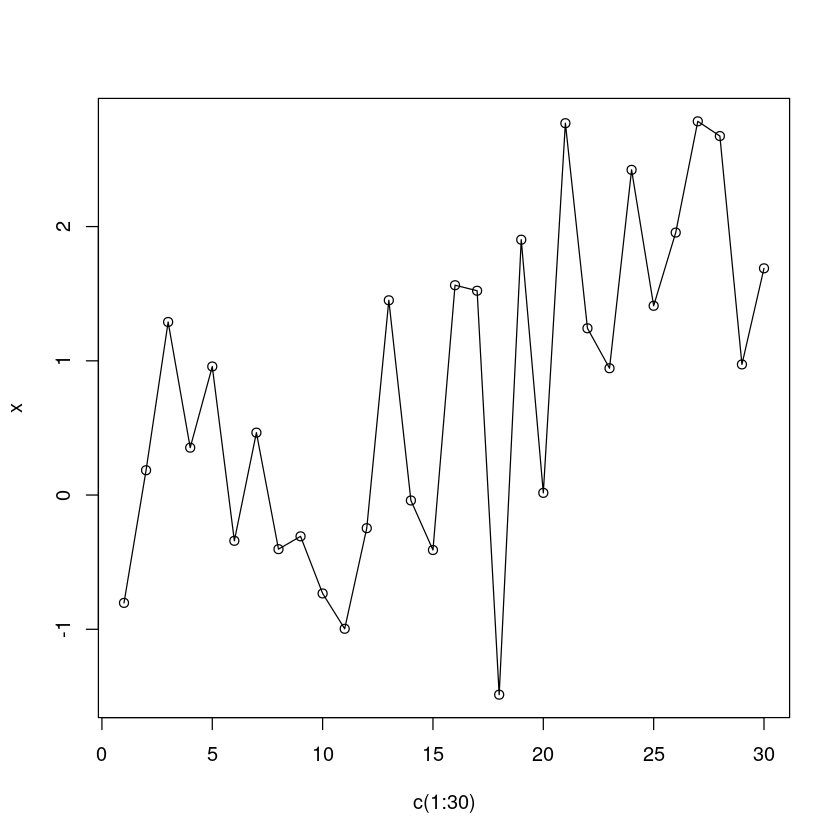

In [14]:
plot(c(1:30) , x , type ="l")
points(c(1:30) , x , type = "p")

In [20]:
T[n0 : 30] > h[n0: 30]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE

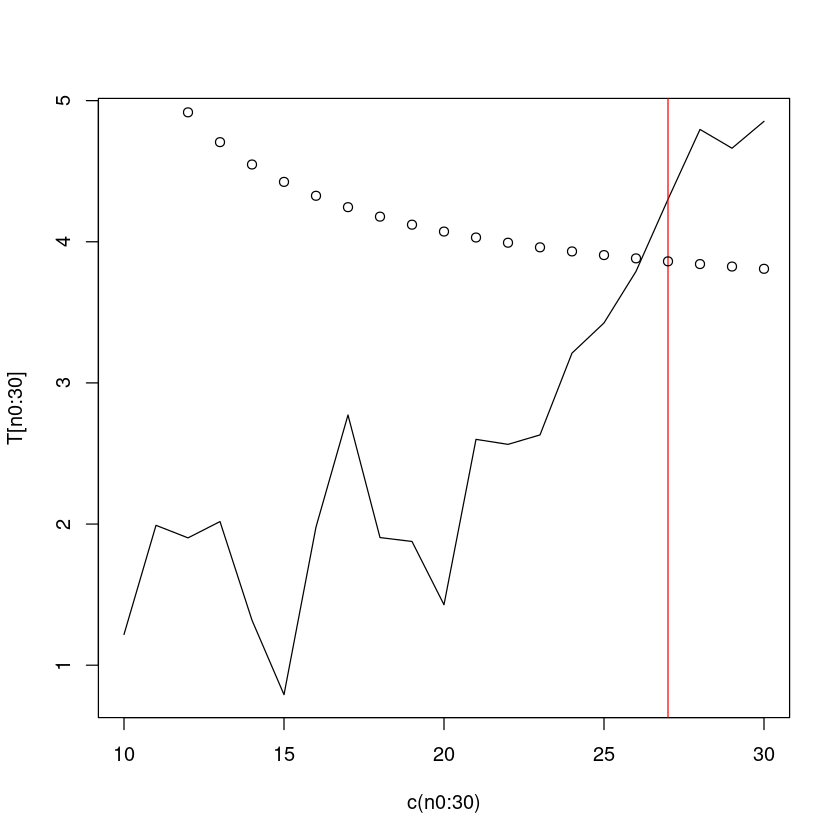

In [19]:
plot(c(n0 : 30) , T[n0 : 30], type ="l")
abline(v = 27, col = 'red')
points(c(n0 : 30) , h[n0: 30] , type = "p")

### Problem 2

In [23]:
n = 8

In [25]:
mean_x <-rep (0 , n )
w_n <-rep (0 , n)
s_n <-rep (0 , n)
t_n <- rep (0 , n)
at_n <-rep (0 , n)
fat_n <-rep (0 , n)
u_n <- rep (0 , n)
x_n <-c(9.45 , 7.99 , 9.29 , 11.66 , 12.16 , 10.18 , 8.04 , 11.46)
mean_x[1] = x_n[1]
w_n[1] = 0

In [ ]:
i = 1

In [27]:
for ( i in 2: n) 
{
    mean_x[i] <- mean_x[i-1] + (x_n[i] - mean_x[i-1]) / i
    w_n[i] <- w_n[i-1] + ((i-1)*(x_n[i] - mean_x[i-1]) ^2) / i
    s_n[i] <- sqrt(w_n[i]/(i-1))
    if(i>= 3) 
    {
        a <- sqrt((i-1)/i)
        t_n[i] <- (x_n[i] - mean_x[i-1])/s_n[i-1]
        at_n[i] <- a*t_n[i]
        fat_n[i] <- pt(at_n[i] , i-2)
        u_n[i] = qnorm(fat_n[i], mean =0 , sd =1)
    }
}

In [28]:
table_2 <-data.frame(cbind(x_n , mean_x , w_n, s_n,t_n,at_n,fat_n,u_n))
print(table_2)


    x_n    mean_x       w_n       s_n         t_n        at_n     fat_n
1  9.45  9.450000  0.000000 0.0000000  0.00000000  0.00000000 0.0000000
2  7.99  8.720000  1.065800 1.0323759  0.00000000  0.00000000 0.0000000
3  9.29  8.910000  1.282400 0.8007496  0.55212447  0.45080774 0.6348123
4 11.66  9.597500  6.954275 1.5225281  3.43428187  2.97417534 0.9515516
5 12.16 10.110000 12.207400 1.7469545  1.68305602  1.50537107 0.8853507
6 10.18 10.121667 12.211483 1.5627849  0.04006973  0.03657849 0.5137131
7  8.04  9.824286 15.925771 1.6292008 -1.33202378 -1.23321439 0.1361535
8 11.46 10.028750 18.266888 1.6154118  1.00399797  0.93915410 0.8080487
          u_n
1  0.00000000
2  0.00000000
3  0.34462630
4  1.66008790
5  1.20216767
6  0.03438045
7 -1.09776546
8  0.87072798


### problem 2 (b)
The Shapiro–Wilk test is a test of normality in frequentist statistics. It was published in 1965 by Samuel Sanford Shapiro and Martin Wilk.
The Shapiro–Wilk test tests the null hypothesis that a sample x1, ..., xn came from a normally distributed population.

In [31]:
shapiro.test(u_n[3: n])



	Shapiro-Wilk normality test

data:  u_n[3:n]
W = 0.96678, p-value = 0.8702


As p-value is over than 0.05,  U_n is normal distribution

### Problem 3
Scenario 1

In [65]:
library ( MASS )

In [66]:
library ( MSQC )

In [67]:
mu_0<-c(0,0,0)
s_0<-matrix(c(1, 0.8, 0.5, 
             0.8, 1, 0.8,
             0.5, 0.8, 1),3,3)
mu_1<-c(1,0,0)
s_1<-1.1*(s_0)

In [68]:
sample<-data.frame(mvrnorm(30, mu=mu_0, Sigma=s_0))
print(sample[10:12,,])

            X1           X2         X3
10  0.19935224  0.005079412  0.4231441
11  0.03916619 -0.562176163 -0.3416184
12 -1.54956295 -0.699066074 -0.3815355


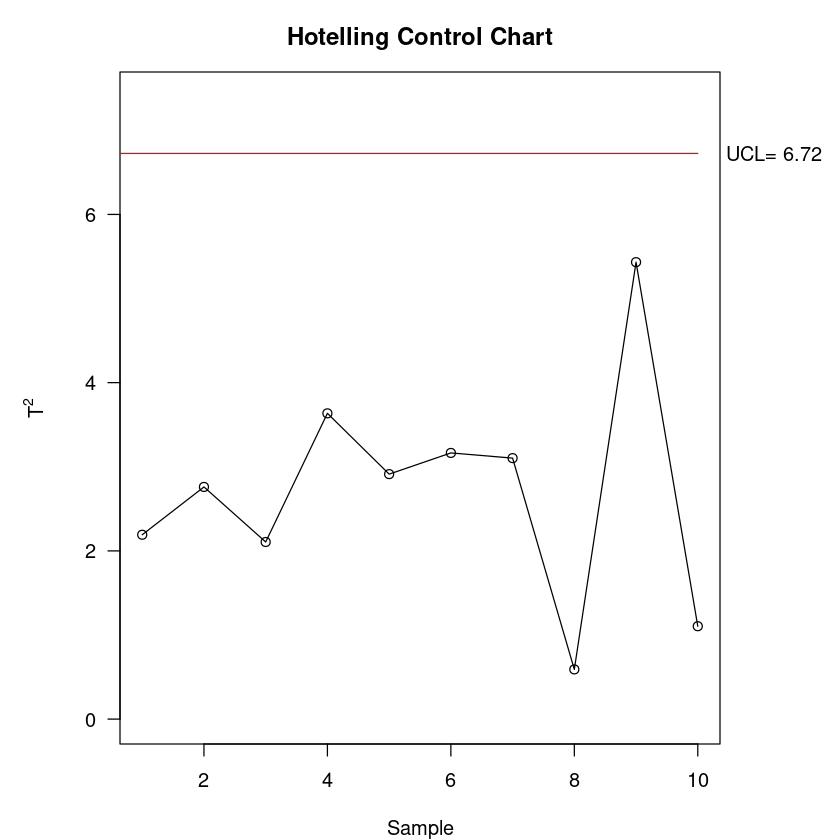

In [69]:
Xmv <- mult.chart(sample[1:10,,], type = "t2") $Xmv
S <- mult.chart(sample[1:10,,], type = "t2") $covariance

In [70]:
print(Xmv)
print(S)

[1] -0.15 -0.09  0.01
     [,1] [,2] [,3]
[1,] 0.85 0.98  0.8
[2,] 0.98 1.40  1.2
[3,] 0.80 1.20  1.1


In [71]:
sample_11_scen1<-mvrnorm(1, mu=mu_1, Sigma=s_0)
print(sample_11_scen1)

[1] -0.7188094 -1.1775260 -1.1865511


In [72]:
sample[11,]=sample_11_scen1
print(sample[10:12,,])

           X1           X2         X3
10  0.1993522  0.005079412  0.4231441
11 -0.7188094 -1.177525977 -1.1865511
12 -1.5495629 -0.699066074 -0.3815355


[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


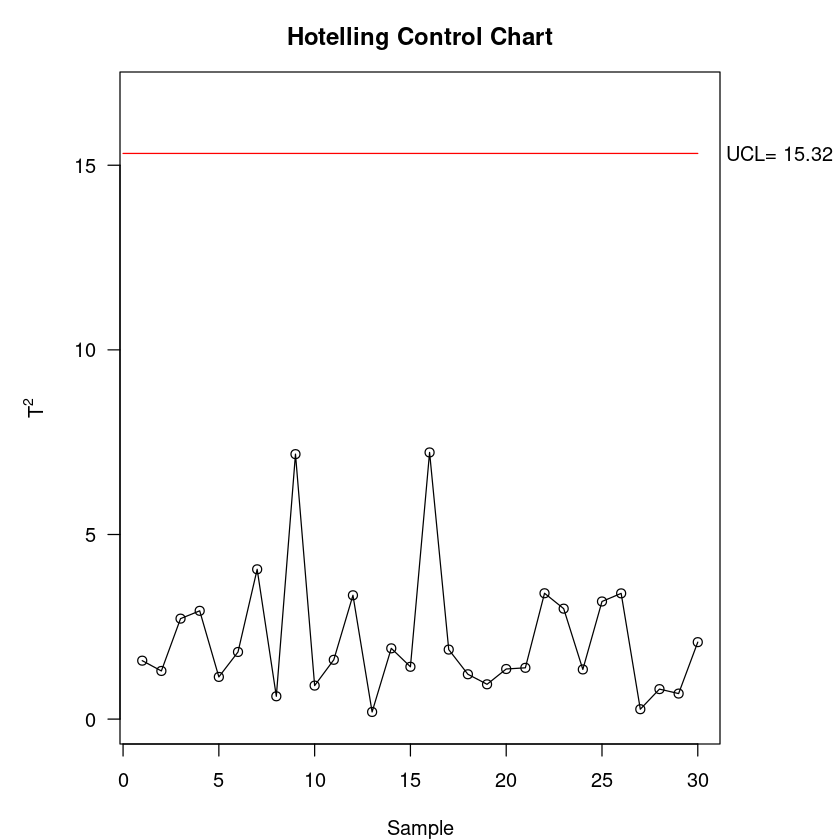

In [73]:
mult.chart(sample, type = "t2", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "t2", Xmv = mu_0, S = s_0)$covariance

[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


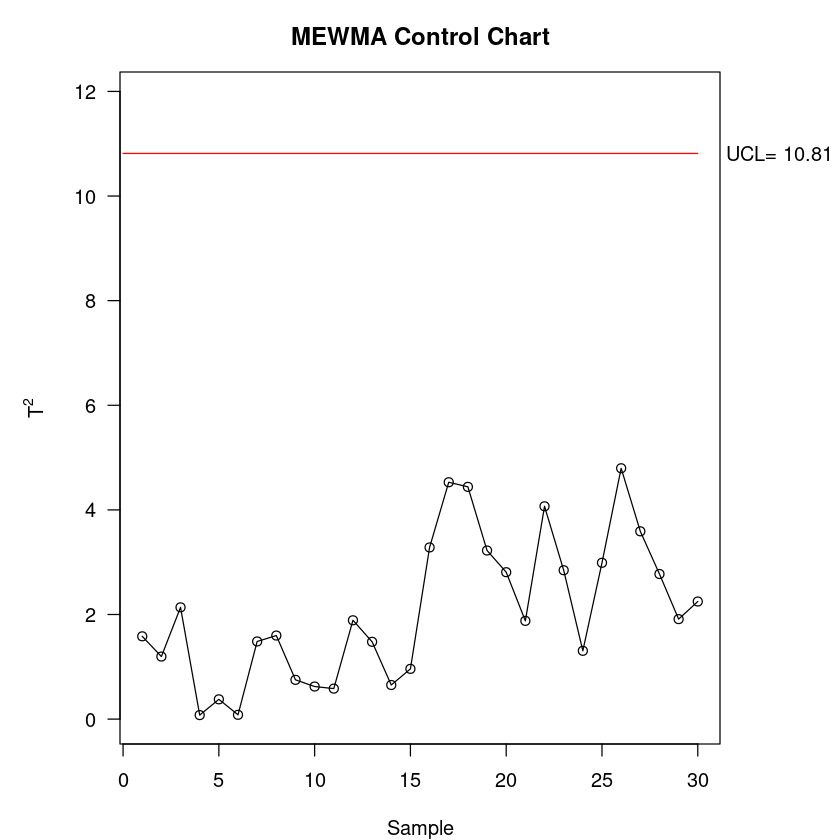

In [74]:
mult.chart(sample, type = "mewma", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "mewma", Xmv = mu_0, S = s_0)$covariance

[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


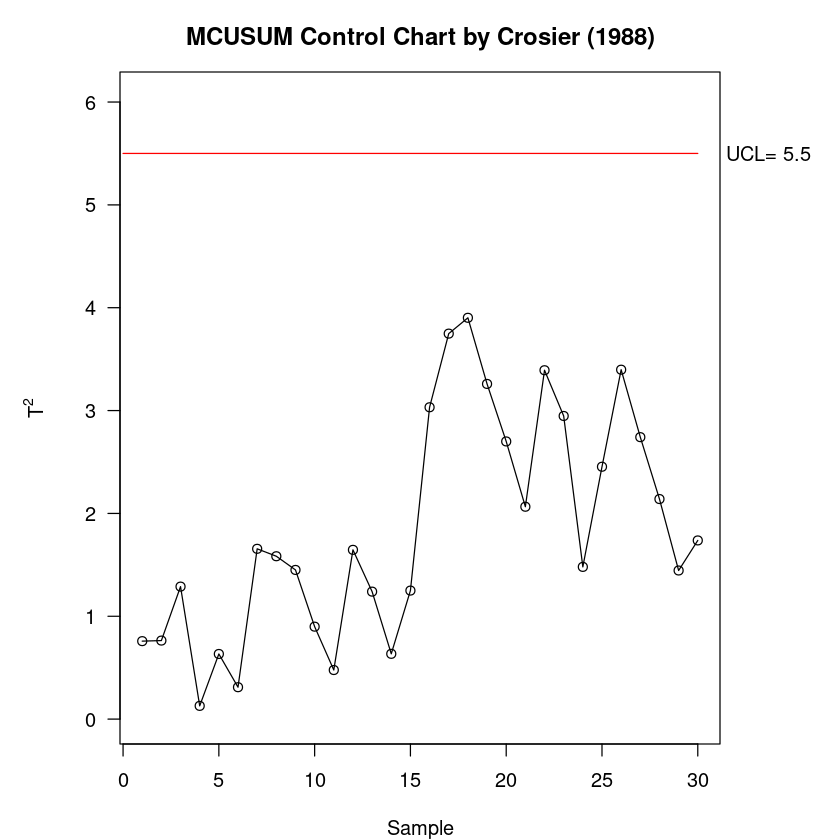

In [81]:
mult.chart(sample, type = "mcusum", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "mcusum", Xmv = mu_0, S = s_0)$covariance

### Scenario 2

In [82]:
sample_11_scen2<-mvrnorm(1, mu=mu_0, Sigma=s_1)
print(sample_11_scen2)

[1] 1.100251 1.707915 2.193032


In [83]:
sample[11,]=sample_11_scen2
print(sample[10:12,,])

           X1           X2         X3
10  0.1993522  0.005079412  0.4231441
11  1.1002513  1.707915119  2.1930321
12 -1.5495629 -0.699066074 -0.3815355


[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


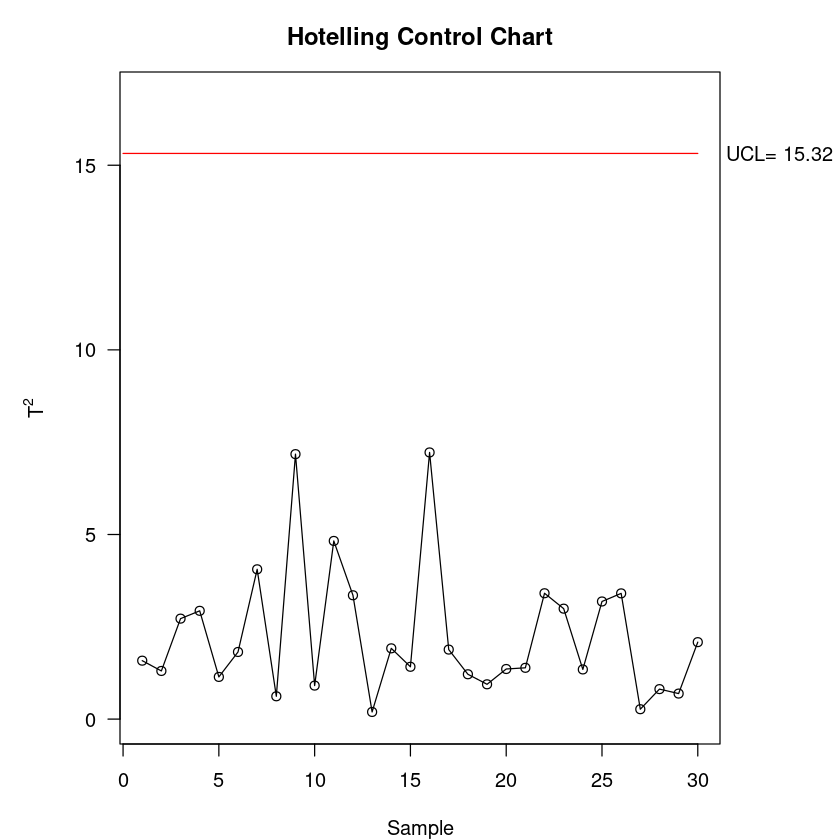

In [84]:
mult.chart(sample, type = "t2", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "t2", Xmv = mu_0, S = s_0)$covariance

[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


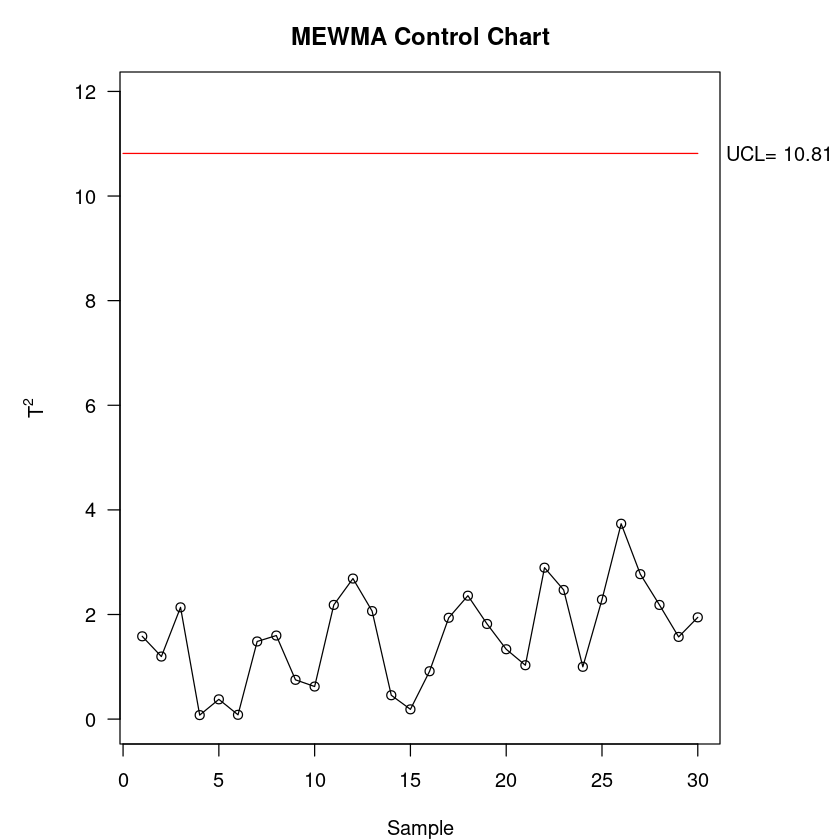

In [85]:
mult.chart(sample, type = "mewma", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "mewma", Xmv = mu_0, S = s_0)$covariance

[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


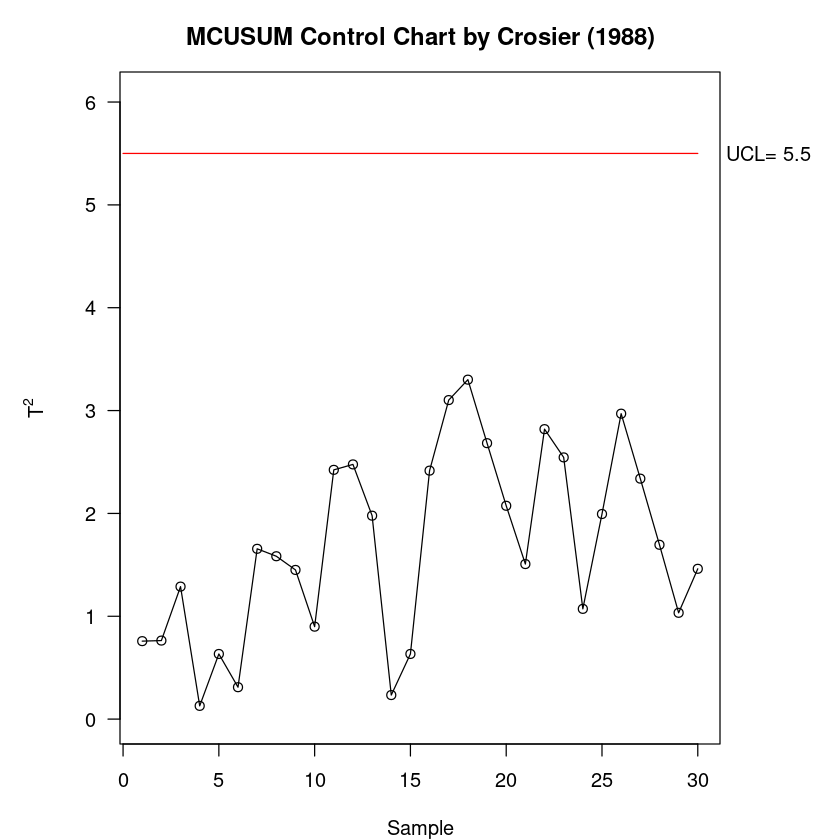

In [86]:
mult.chart(sample, type = "mcusum", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "mcusum", Xmv = mu_0, S = s_0)$covariance

### Scenario 3

In [87]:
sample_11_scen3<-mvrnorm(1, mu=mu_1, Sigma=s_1)
print(sample_11_scen3)

[1]  0.7497903 -0.7867534 -0.3323474


In [88]:
sample[11,]=sample_11_scen3
print(sample[10:12,,])

           X1           X2         X3
10  0.1993522  0.005079412  0.4231441
11  0.7497903 -0.786753410 -0.3323474
12 -1.5495629 -0.699066074 -0.3815355


[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


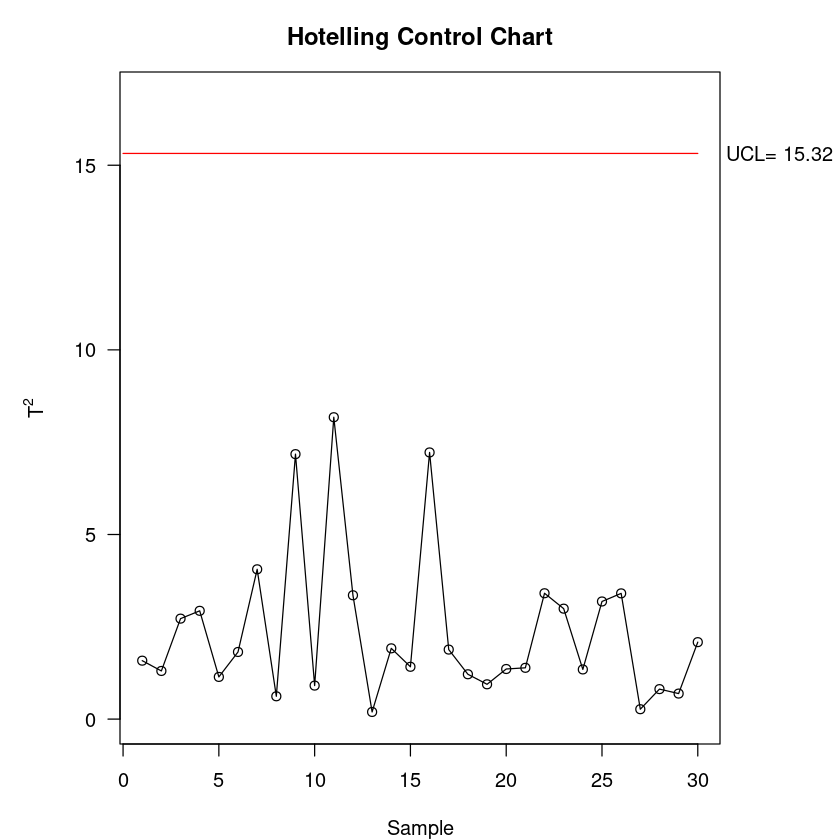

In [89]:
mult.chart(sample, type = "t2", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "t2", Xmv = mu_0, S = s_0)$covariance

[1] 0 0 0

1.0,0.8,0.5
0.8,1.0,0.8
0.5,0.8,1.0


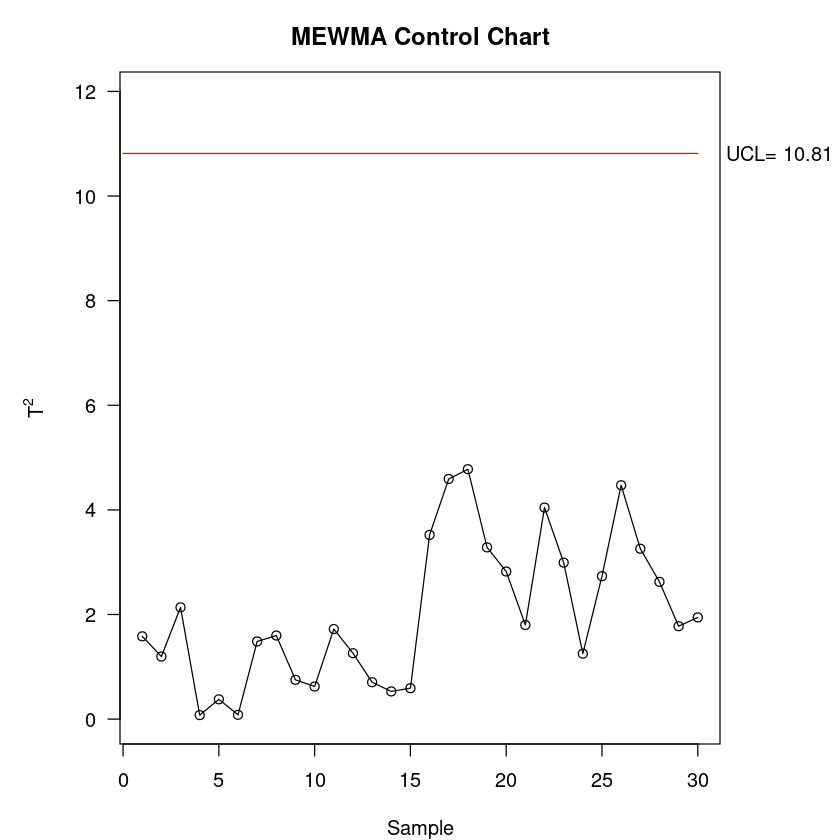

In [90]:
mult.chart(sample, type = "mewma", Xmv = mu_0, S = s_0)$Xmv
mult.chart(sample, type = "mewma", Xmv = mu_0, S = s_0)$covariance

[1] 0 0 0

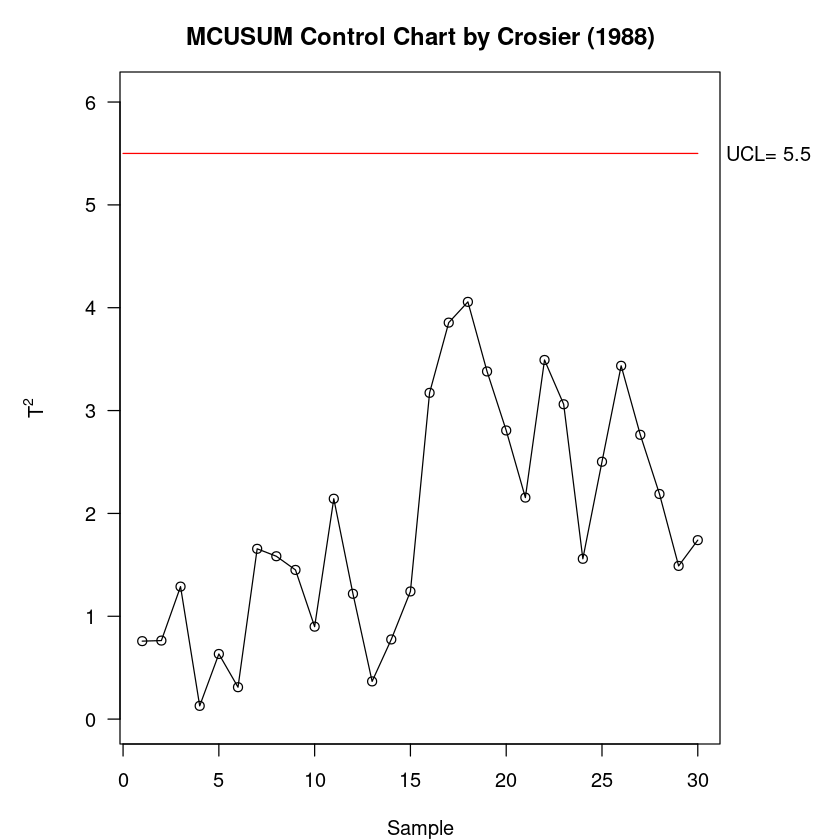

In [91]:
mult.chart(sample, type = "mcusum", Xmv = mu_0, S = s_0)$Xmv